In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [7]:
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report,roc_curve
from tqdm import tqdm

In [117]:
import seaborn as sns 
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier

In [161]:
train = pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/train.csv')
test = pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/test.csv')

In [162]:
members=pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/members.csv')
songs=pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/songs.csv')
songs_extra_info=pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/song_extra_info.csv')
submission=pd.read_csv('/users/whf/downloads/kkbox-music-recommendation-challenge/sample_submission.csv')

In [163]:
members.head

<bound method NDFrame.head of                                                msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                201

In [164]:
train.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [11]:
members.head(5)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [12]:
songs.head(5)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [9]:
songs_extra_info.head(5)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [165]:
def str_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan


songs_extra_info['years']=songs_extra_info['isrc'].apply(str_to_year)
songs_extra_info.head

<bound method NDFrame.head of                                               song_id  \
0        LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=   
1        ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=   
2        u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=   
3        92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=   
4        0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=   
...                                               ...   
2295966  hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=   
2295967  N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=   
2295968  pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=   
2295969  QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=   
2295970  DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=   

                              name          isrc   years  
0                               我們  TWUM71200043  2012.0  
1                  Let Me Love You  QMZSY1600015  2016.0  
2                              原諒我  TWA530887303  2008.0  
3                          Classic  USSM11301446 

In [166]:
songs_extra_info.drop(['isrc','name'],axis=1,inplace= True)

In [167]:
train0=train.merge(songs_extra_info,on= 'song_id',how='left')
test0=test.merge(songs_extra_info,on= 'song_id',how='left')

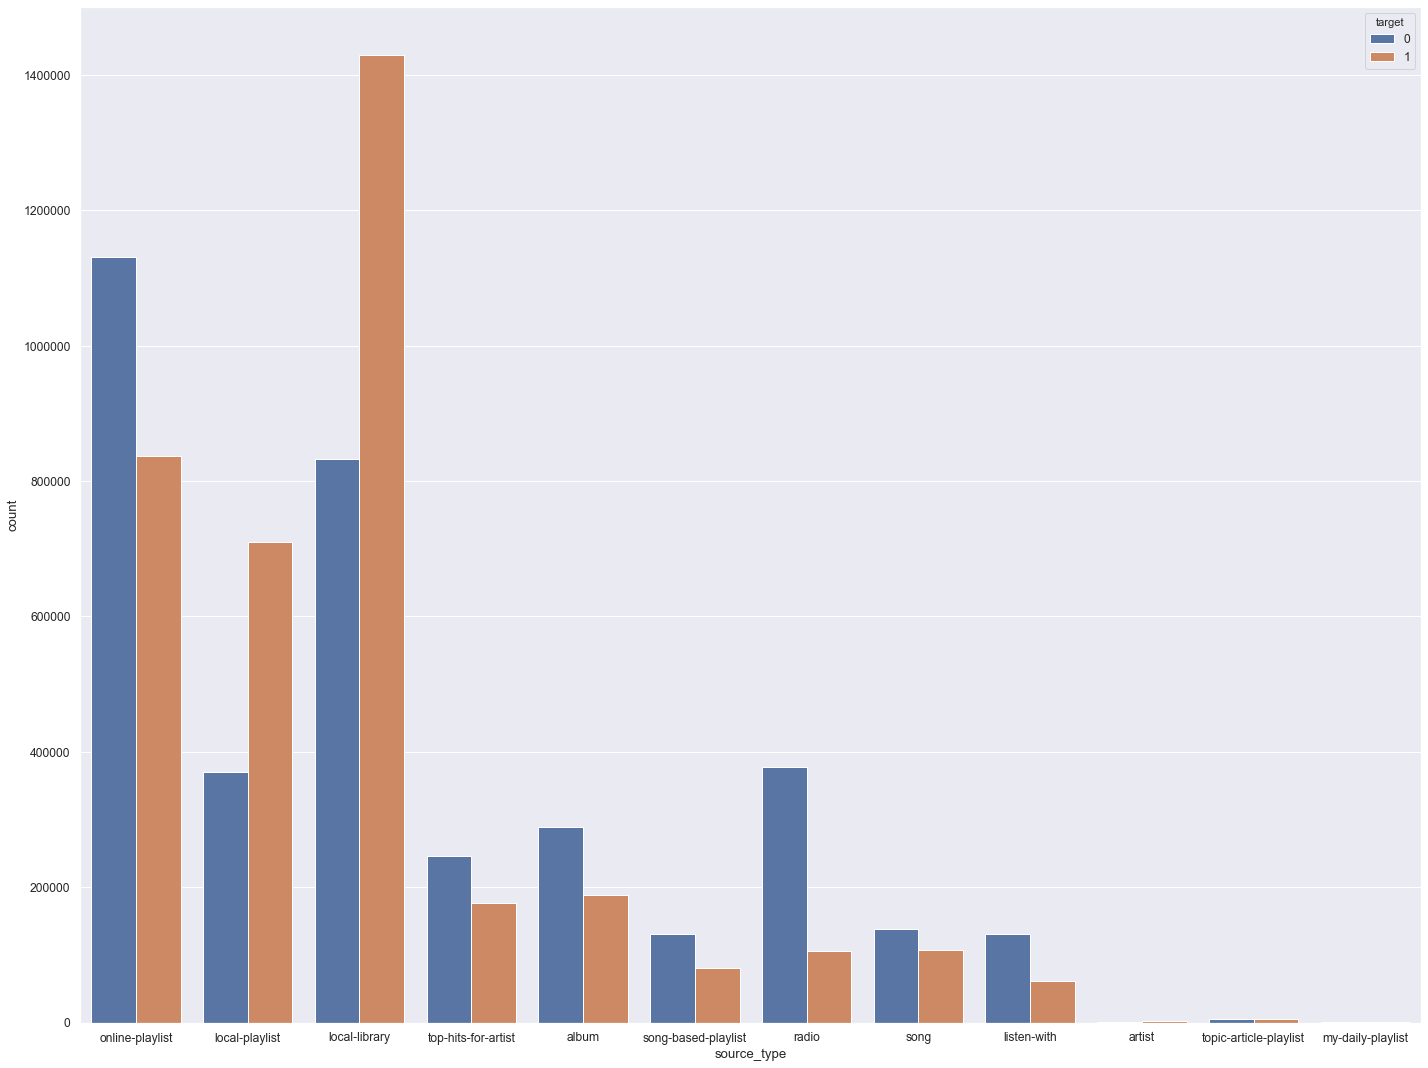

In [127]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.1)
sns.countplot(x='source_type', hue='target', data=train)
sns.set(style="darkgrid")
plt.tight_layout()

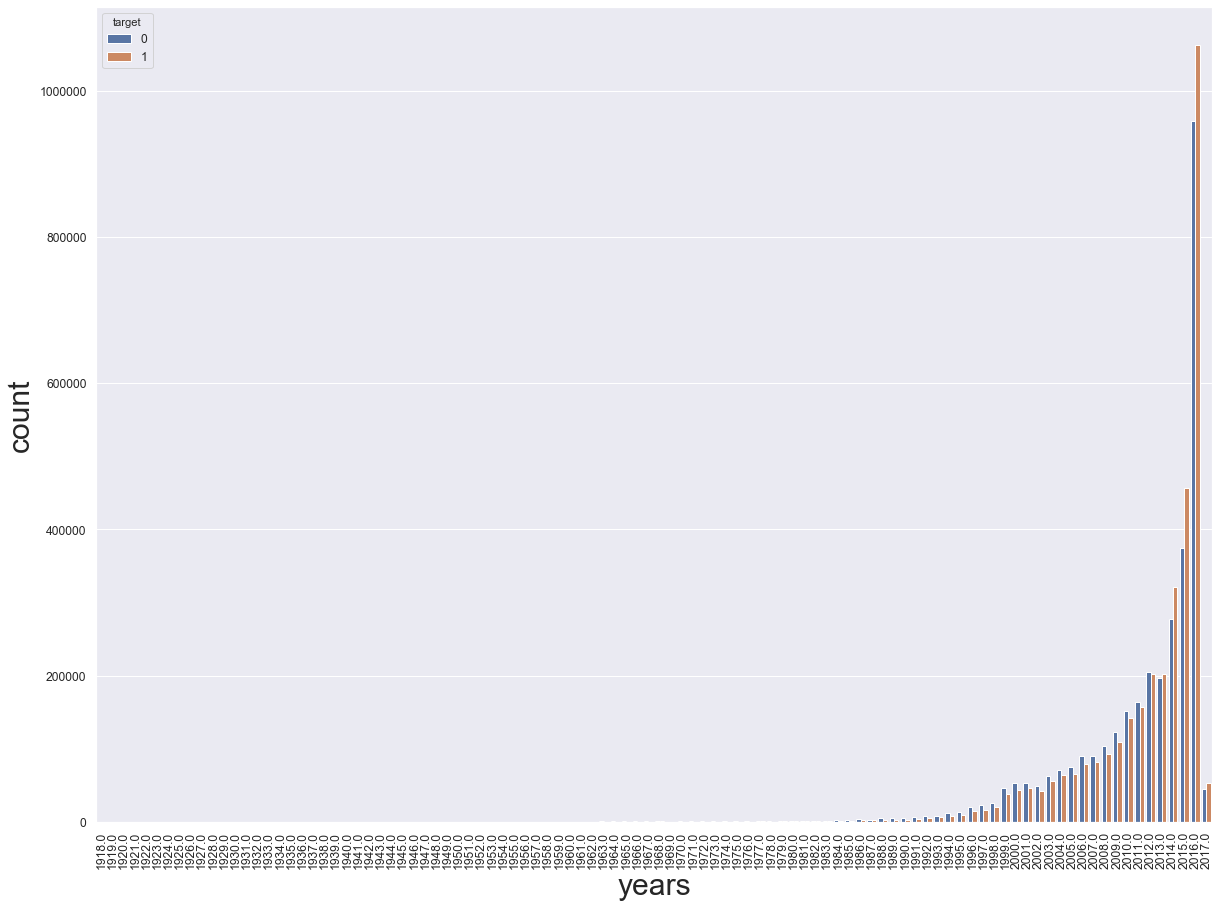

In [134]:
train_year=train0[['target','years']].groupby('years').sum()
train_year

train0
plt.figure(figsize=(20,15))
sns.set(font_scale=1.1)
plt.xlabel('year',fontsize=30)
plt.ylabel('target_count',fontsize=30)
plt.xticks(rotation='90')
sns.countplot(x='years', hue='target', data=train0)
sns.set(style="darkgrid")

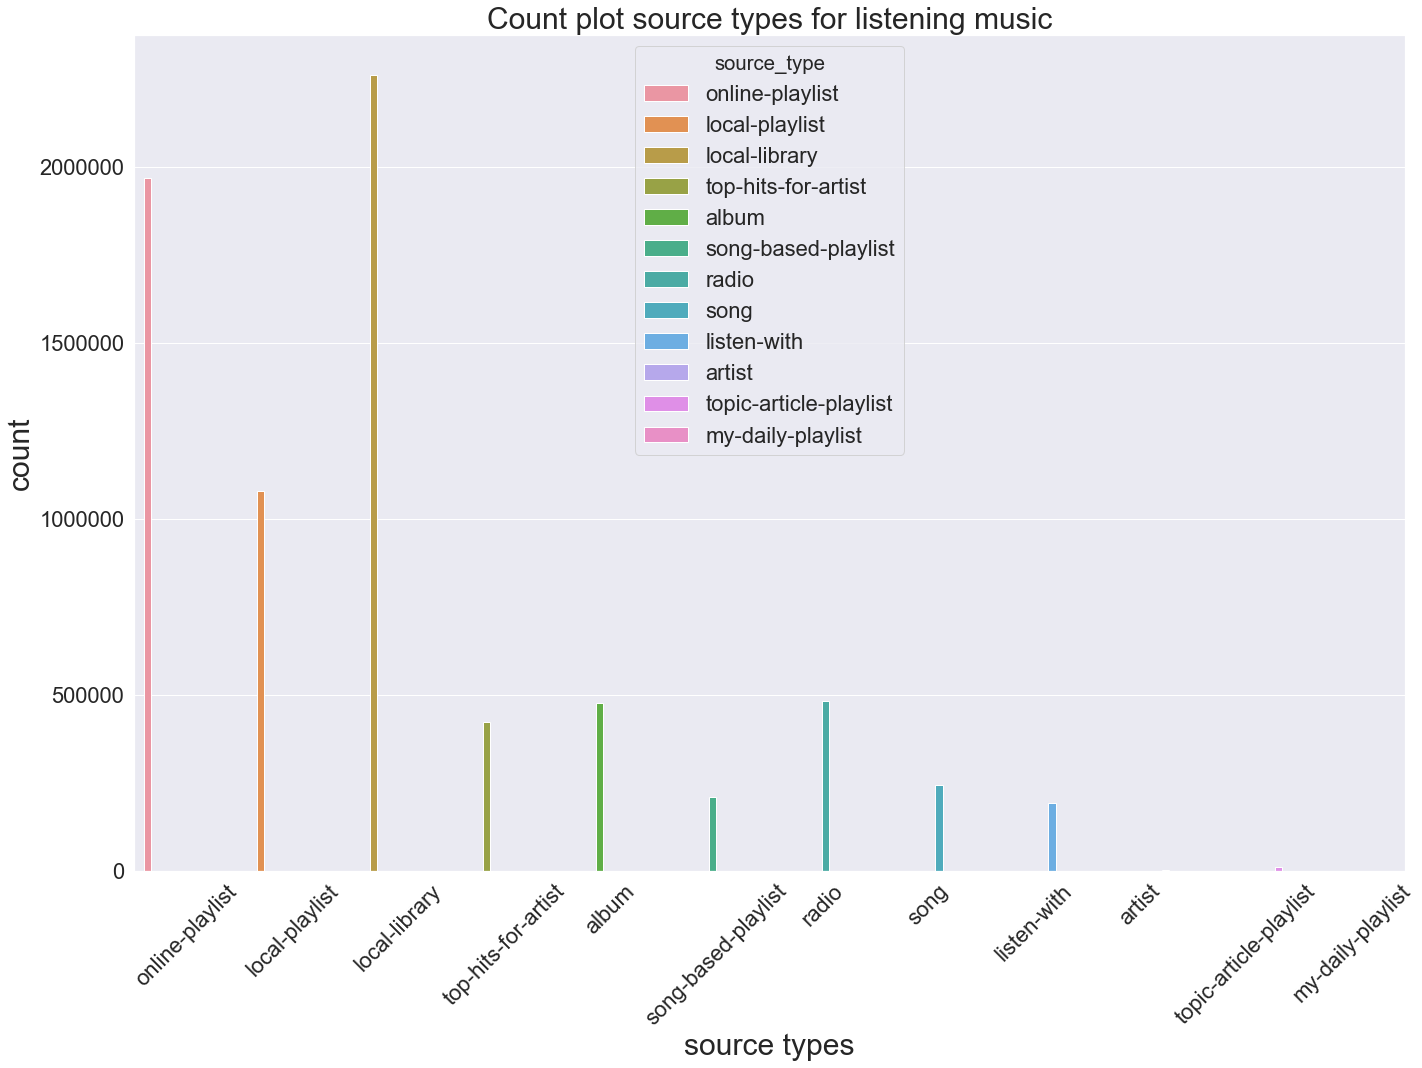

In [120]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

In [159]:
from sklearn.model_selection import KFold
# Create a Cross Validation with 3 splits
kf = KFold(n_splits=3)

from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

predictions = np.zeros(shape=[len(test)])


for f in train.columns: 
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))

for f in test.columns: 
    if test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(test[f].values)) 
        test[f] = lbl.transform(list(test[f].values))
        
        
# For each KFold
for train_indices ,validate_indices in kf.split(train) : 
    train_data = lgb.Dataset(train.drop(['target'],axis=1).loc[train_indices,:],label=train.loc[train_indices,'target'])
    val_data = lgb.Dataset(train.drop(['target'],axis=1).loc[validate_indices,:],label=train.loc[validate_indices,'target'])

    params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.2 ,
            'verbose': 0,
            'num_leaves': 2**8,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 256,
            'num_rounds': 80,
            'metric' : 'auc'
        }
    # Train the model    
    lgbm_model = lgb.train(params, train_data, 100, valid_sets=[val_data])
    predictions += lgbm_model.predict(test.drop(['id'],axis=1))
    del lgbm_model
    # We get the ammount of predictions from the prediction list, by dividing the predictions by the number of Kfolds.
predictions = predictions/3


# Set the target to our predictions
submission.target=predictions
# Save the submission file
submission.to_csv('submission.csv',index=False)

[1]	valid_0's auc: 0.681636
[2]	valid_0's auc: 0.68453
[3]	valid_0's auc: 0.685141
[4]	valid_0's auc: 0.685602
[5]	valid_0's auc: 0.685689
[6]	valid_0's auc: 0.685786
[7]	valid_0's auc: 0.686495
[8]	valid_0's auc: 0.686957
[9]	valid_0's auc: 0.687005
[10]	valid_0's auc: 0.687697
[11]	valid_0's auc: 0.687513
[12]	valid_0's auc: 0.687579
[13]	valid_0's auc: 0.688806
[14]	valid_0's auc: 0.688825
[15]	valid_0's auc: 0.688934
[16]	valid_0's auc: 0.688874
[17]	valid_0's auc: 0.689285
[18]	valid_0's auc: 0.68962
[19]	valid_0's auc: 0.689566
[20]	valid_0's auc: 0.690627
[21]	valid_0's auc: 0.690763
[22]	valid_0's auc: 0.6908
[23]	valid_0's auc: 0.691315
[24]	valid_0's auc: 0.691343
[25]	valid_0's auc: 0.691193
[26]	valid_0's auc: 0.691432
[27]	valid_0's auc: 0.691324
[28]	valid_0's auc: 0.691333
[29]	valid_0's auc: 0.691479
[30]	valid_0's auc: 0.691473
[31]	valid_0's auc: 0.691454
[32]	valid_0's auc: 0.691384
[33]	valid_0's auc: 0.69125
[34]	valid_0's auc: 0.691292
[35]	valid_0's auc: 0.69126


In [158]:
from sklearn.model_selection import KFold
# Create a Cross Validation with 3 splits
kf = KFold(n_splits=3)

from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

predictions = np.zeros(shape=[len(test0)])


for f in train0.columns: 
    if train0[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train0[f].values)) 
        train0[f] = lbl.transform(list(train0[f].values))

for f in test0.columns: 
    if test0[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(test0[f].values)) 
        test0[f] = lbl.transform(list(test0[f].values))
        
        
# For each KFold
for train0_indices ,validate_indices in kf.split(train0) : 
    train0_data = lgb.Dataset(train0.drop(['target'],axis=1).loc[train0_indices,:],label=train0.loc[train0_indices,'target'])
    val_data = lgb.Dataset(train0.drop(['target'],axis=1).loc[validate_indices,:],label=train0.loc[validate_indices,'target'])

    params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.2 ,
            'verbose': 0,
            'num_leaves': 2**8,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 256,
            'num_rounds': 80,
            'metric' : 'auc'
        }
    # Train the model    
    lgbm_model = lgb.train(params, train0_data, 100, valid_sets=[val_data])
    predictions += lgbm_model.predict(test0.drop(['id'],axis=1))
    del lgbm_model
    # We get the ammount of predictions from the prediction list, by dividing the predictions by the number of Kfolds.
predictions = predictions/3


# Set the target to our predictions
submission.target=predictions
# Save the submission file
submission.to_csv('submission0.csv',index=False)

[1]	valid_0's auc: 0.690621
[2]	valid_0's auc: 0.693667
[3]	valid_0's auc: 0.695196
[4]	valid_0's auc: 0.696066
[5]	valid_0's auc: 0.696533
[6]	valid_0's auc: 0.696839
[7]	valid_0's auc: 0.696918
[8]	valid_0's auc: 0.697726
[9]	valid_0's auc: 0.698089
[10]	valid_0's auc: 0.698384
[11]	valid_0's auc: 0.698796
[12]	valid_0's auc: 0.69935
[13]	valid_0's auc: 0.699679
[14]	valid_0's auc: 0.69992
[15]	valid_0's auc: 0.700061
[16]	valid_0's auc: 0.700023
[17]	valid_0's auc: 0.700054
[18]	valid_0's auc: 0.700052
[19]	valid_0's auc: 0.700785
[20]	valid_0's auc: 0.701598
[21]	valid_0's auc: 0.701871
[22]	valid_0's auc: 0.701974
[23]	valid_0's auc: 0.702081
[24]	valid_0's auc: 0.702831
[25]	valid_0's auc: 0.703051
[26]	valid_0's auc: 0.703028
[27]	valid_0's auc: 0.703051
[28]	valid_0's auc: 0.703095
[29]	valid_0's auc: 0.703293
[30]	valid_0's auc: 0.703306
[31]	valid_0's auc: 0.703352
[32]	valid_0's auc: 0.703242
[33]	valid_0's auc: 0.703186
[34]	valid_0's auc: 0.703656
[35]	valid_0's auc: 0.703